# Relationships between variables

## Graphical representations

So far we have only looked at one variable at a time. In Two variables are related if knowing one gives you information about the other. For example, height and weight are related; people who are taller tend to be heavier. Of course, it is not a perfect relationship: there are short heavy people and tall light ones. But if you are trying to guess someone’s weight, you will be more accurate if you know their height than if you don’t.

Scatter plots provide a general impression of the relationship between variables, but there are other visualizations that provide more insight into the nature of the relation‐ship. One option is to bin one variable and plot percentiles of the other.

In statistical model, we generally have one variable that's the output and another one variable that's the input. We'll refer the output variable like the response variable noted with the letter *y*. On the other hand we have the explanatory variable noted with the letter *x*.

We put the response variable on vertical axis and the explanatory on horizontal axis.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn style
sns.set()

In [2]:
"""Funciones especiales"""

# Importamos la biblioteca necesaria para enlazar con el archivo requerido
import sys
sys.path.insert(0, '../statistics')

# importamos la función que necesitamos
#from DataManipulation import SampleRows
import DataManipulation as dm
from functions import ecdf
from functions_corr import cov, correlation

In [3]:
# DataFrame example
df = pd.read_csv('data/TSheightweight.csv', header=0, index_col=0)

# select five thousand of rows
sample = dm.SampleRows(df=df, nrows=5000)

In [4]:
# selecting values
height, weight = sample['htm3'], sample['wtkg2']

# preview of the data
print("height data")
print(height[0:10])
print("weight data")
print(weight[0:10])

height data
187876    175.0
299266    152.0
323531    165.0
292351    183.0
137406    160.0
330318    188.0
177433    178.0
162477    178.0
73449     157.0
313348    175.0
Name: htm3, dtype: float64
weight data
187876     70.00
299266     63.64
323531    119.55
292351    104.55
137406     63.64
330318     77.27
177433     84.09
162477     90.91
73449      76.82
313348     72.73
Name: wtkg2, dtype: float64


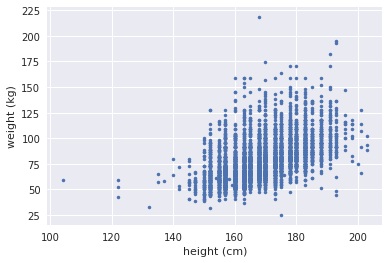

In [5]:
#plot the posible relationship between height and weight
plt.plot(height, weight, marker='.', linestyle='none')
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

But this is not the best representation of the data, because the data are packed into columns. The problem is that the heights are rounded to the nearest inch, converted to centimeters, and then rounded again. Some information is lost in translation. We can’t get that information back, but *we can minimize* the effect on the scatter plot by **jittering** the data, which means adding *random noise* to reverse the effect of rounding off. Since these measurements were rounded to the nearest inch, they might be off by up to 0.5 inches or 1.3 cm. Similarly, the weights might be off by 0.5 kg.

In [6]:
# Jitter definition
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values

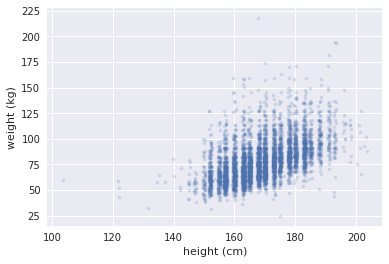

In [7]:
# jittering the data
height = Jitter(height)
weight = Jitter(weight)

# plot the new results
plt.plot(height, weight, marker='.', linestyle='none', alpha=0.2)
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

To handle larger datasets, another option is a hexbin plot, which divides the graph into hexagonal bins and colors each bin according to how many data points fall in it.

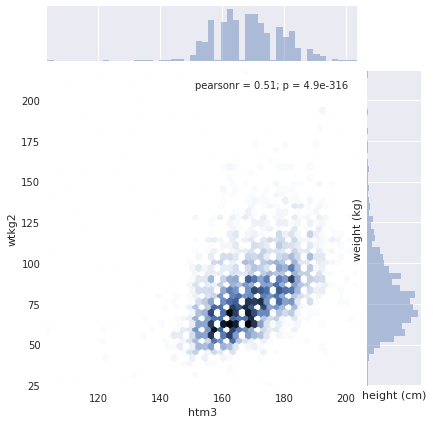

In [8]:
# hexbins
sns.jointplot(x=height, y=weight, kind='hex')
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

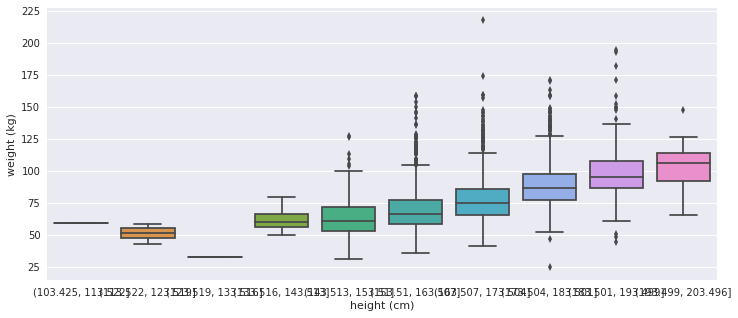

In [9]:
# boxplot

#figure
plt.figure(figsize=(12,5))

# draw the plot
sns.boxplot(y=weight, x=pd.cut(x=height, bins=10))
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

# Characterizing Relationships

## Characterizins bivariate relationships

* Form (linear, non-linear, quadratic, etc...)
* Direction (positive or negative)
* Strength (how much scatter/noise?)
* Outliers


Las gráficas de dispersión nos dan una impresión general de la relación que puede existir entre dos variables, pero hay otros tipos de gráficos que nos pueden dan una mayor información de la naturaleza de las relaciones. Una opción es encapsular una variable y calcular los percentiles de la otra.

En Python tendremos que limpiar primero los datos, si no lo hemos hecho con anterioridad, y escoger un buen intervalo sobre el cual encapsular los datos de la variable elegida.

En este caso vamos a elegir la variable altura. Vamos a construir una serie de "bins" donde iremos encapsulando cada uno de los datos. El mínimo será escogido atendiendo al percentil 0.1, mientras que el máximo será el relativo al percentil 99.9


In [10]:
# drops rows with NaN values in any field
df_2 = df.dropna(subset=['htm3', 'wtkg2'])

#lens
print("Longuitud de df: ", len(df))
print("Longuitud de df_2: ", len(df_2))

# Array of bins from 135 to 210 in increments of 5
bins = np.arange(135, 210, 5)

Longuitud de df:  414509
Longuitud de df_2:  395832


Una vez tenemos un array de 15 elementos, iremos encapsulando los datos en cada uno de los "bins", como si estuvieramos realizando un histograma. Para comprobar o conocer el lugar correspondiente de cada dato en el array anterior, usamos una función llamada **digitize**, este nos permite seleccionar cada dato en su correspondiente "bin", devolviendo un indice de dicho "bin".
Una vez tenemos un array de indices, de la misma longuitud que el Series, agrupamos los datos conforme a dichos indices.

In [11]:
# computes the index of the bin that contains each value
indices = np.digitize(df_2.htm3, bins)

# comprobamos
print("Datos:")
print(df_2.htm3.head(3))
print("Indices: ", indices[0:3])
print(bins)

# DataFrame object groupby
groups = df_2.groupby(indices)

Datos:
0    157.0
1    163.0
3    170.0
Name: htm3, dtype: float64
Indices:  [5 6 8]
[135 140 145 150 155 160 165 170 175 180 185 190 195 200 205]


Una vez tenemos la información agrupada, calculamos la media de cada altura, y la distribución acumulativa de la variable peso.

In [12]:
# for each group we can compute the mean height
heights = [group.htm3.mean() for i, group in groups]

# preview information
print("Tamaño del array: ", len(heights))
print("Valores del array")
print(heights)
    
# compute the CDF of weight
cdfs = [ecdf(group.wtkg2) for i, group in groups]

print()
print("Primer grupo de datos de la variable peso")
print(cdfs[0])

Tamaño del array:  16
Valores del array
[120.12459016393443, 135.78508771929825, 141.43396226415095, 146.33718778908417, 151.52843968228584, 156.3503419942746, 161.67421045177736, 166.56972746679975, 171.40954232482787, 176.54908086026674, 181.57596142807944, 186.32469990536435, 191.7859712230216, 196.6426561620709, 201.73827160493826, 210.58778625954199]

Primer grupo de datos de la variable peso
(array([ 22.73,  22.73,  22.73,  22.73,  22.73,  25.  ,  27.27,  29.55,
        30.  ,  30.45,  31.82,  31.82,  32.27,  32.73,  34.09,  34.09,
        34.55,  35.45,  35.91,  36.36,  36.36,  36.82,  38.18,  38.18,
        38.64,  40.91,  41.82,  41.82,  42.73,  43.18,  43.18,  43.18,
        43.18,  44.09,  44.55,  45.  ,  45.45,  45.45,  45.45,  45.45,
        45.45,  45.91,  46.36,  46.36,  46.82,  47.27,  47.27,  47.27,
        47.73,  47.73,  47.73,  47.73,  48.18,  48.18,  49.55,  50.  ,
        50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.91,
        50.91,  50.91,  50.91,

Hemos calculado la media de las alturas, las cuales estaban distribuidas en 16 grupos. Por tanto cuando calculamos la distribución acumulativa, nos dará una lista constituida por 16 listas. En cada una de esas 16 listas podemos encontrar los datos ordenados.

Por último vamos a calcular los distintos percentiles de la variable peso. Para ello descomponemos la distribución acumulativa en cada uno de los 16 grupos ordenados. Para cada grupo calculamos el percentil correspondiente.

[71.0, 70.45, 66.82, 68.18, 72.73, 75.0, 79.55, 84.09, 88.64, 94.55, 100.0, 106.82, 113.64, 118.18, 122.73, 113.64]
[61.36, 60.225, 56.82, 58.18, 61.36, 64.55, 68.18, 72.73, 77.27, 84.09, 90.91, 95.45, 101.82, 104.55, 104.55, 88.64]
[52.27, 54.55, 48.64, 50.0, 54.09, 56.82, 59.55, 63.64, 68.18, 75.0, 81.82, 86.36, 90.91, 92.73, 88.64, 79.55]


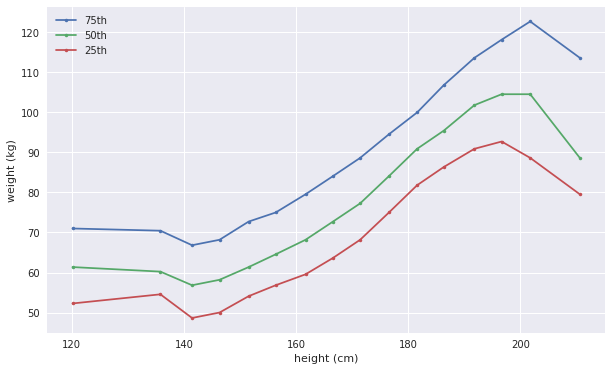

In [13]:
# figure plot
plt.figure(figsize=(10,6))

# percentiles
for percent in [75, 50, 25]:
    weights = [np.percentile(a=x, q=percent) for x, y in cdfs]
    label = '%dth' % percent
    print(weights)
    plt.plot(heights, weights, label=label, marker='.')

# label the axis
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.legend()

# show the plot
plt.show()

Resumiendo, los puntos que vemos son el resultado de:
* por un lado, la media de las alturas agrupadas según una serie de "bins", los cuales los hemos elegido teniendo en cuenta el percentil 0.1, y el percentil 99.9 de los datos de la altura.
* por otro lado, hemos calculado el percentil de la variable peso, escogiendo grupos de datos afines a las alturas previamente elegidas.

Por lo tanto, la información mostrada es:
* Respecto a la variable peso: el peso correspondiente al percentil 75, del grupo de datos que tiene como media de altura 120.1246 cm
* Respecto a la variable altura: la media de altura correspondiente a los "bins" previamente elegidos, agrupando los datos en cada uno de estos "bins"

A continuación presento otra forma de visualizar los datos.

Ahora extraeremos los datos que se encuentren entre los percentiles 0.5 y 99.5, es decir, eliminaremos los puntos *outliers*, y representaremos la información.
Para contrastar, representaremos la información completa. Como veremos, si eliminamos los outliers, podemos ver mucho mejor la forma y la dirección que toma la relación entre las variables.

Percentiles:  [  25 4974]


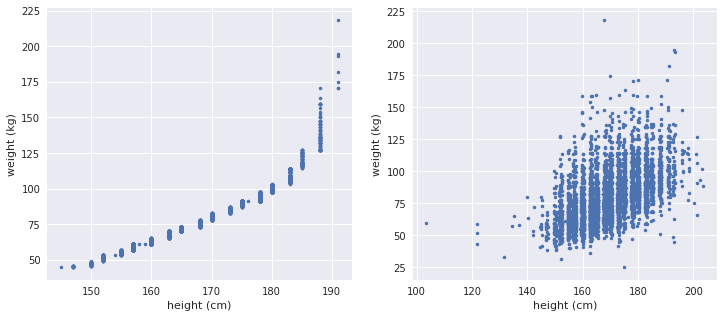

In [14]:
# assign indice to the data
indices = np.arange(0, len(sample))

# percentiles
percentiles = np.percentile(a=indices, q=[0.5, 99.5], interpolation='nearest')

#sorting data

# selecting the data
heights_no_outliers = sample['htm3'].sort_values()[percentiles[0]:percentiles[1]]
weights_no_outliers = sample['wtkg2'].sort_values()[percentiles[0]:percentiles[1]]

# info
print("Percentiles: ",percentiles)

# plot the result
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(heights_no_outliers, weights_no_outliers, marker='.', linestyle='none')
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

plt.subplot(122)
plt.plot(height, weight, marker='.', linestyle='none')
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

Estos gráficos nos permiten ver que efectivamente existe una relación entre las variables, y que esta relación es más fuerte en un determinado intervalo [140, 180] aproximadamente. En los últimos dos gráficos podemos comprobar que si la información se encuentra agrupada, y además no hemos eliminado los *outliers*, es más complicado ver si efectivamente hay una relación entre variables.

## Correlation

A **correlation** is a statistic intended to quantify the strength of the relationship between two variables.

A challenge in measuring correlation is that the variables we want to compare are often not expressed in the same units. And even if they are in the same units, they come from different distributions.

There are two common solutions to these problems:

* Transform each value to a **standard scores** which is the number of standard deviations from the mean. This transform leads to the *Pearson product-moment correlation coefficient*.
* Transform each value to its **rank**, which is its index in the sorted list of values. this transform leads to the *Spearman rank correlation coefficient*.

If X is a series of *n values*, $x_{i}$, we can convert to standard scores by subtracting the mean and dividing by the standard deviation

$$
z_{i} = \frac{x_{i} - \mu}{\sigma}
$$

The numerator is a deviation: the distance from the mean. Dividing by $\sigma$ **standardizes** the deviation, so the values of Z are dimensionless (no units) and their distribution has mean 0 and variance 1.

If X is normally distributed, so is Z. But if X is skewed or has outliers, so does Z; in those cases, it is more robust  to use percentile ranks. If we compute a new variable, R, so that $r_{i}$ is the rank of $x_{i}$, the distribution of *R* is uniform from 1 to *n*, regardless of the distribution of X.

If X is normally distributed, so is Z. But if X is skewed or has outliers, so does Z; in those
cases, it is more robust to use percentile ranks. If we compute a new variable, R, so that $r_{i}$ is the rank of $x_{i}$, the distribution of R is uniform from 1 to n, regardless of the distribution of X.

## Covariance

Covariance is a measure of the tendency of two variables to vary together. If we have
two series, X and Y, their deviations from the mean are:

$$
dx_{i} = x_{i} - \bar{x} \\
dy_{i} = y_{i} - \bar{y}
$$

where x̄ is the sample mean of X and ȳ is the sample mean of Y. If X and Y vary together,
their deviations tend to have the same sign.
If we multiply them together, the product is **positive** when the deviations have the **same
sign** and **negative** when they have the **opposite sign**. So adding up the products gives a
measure of the tendency to vary together.

Covariance is the mean of these products:

$$
Cov(X, Y) = \frac{1}{n} \Sigma dx_{i} dy_{i}
$$

As you can see, covariance is the dot product of the desviations, divided by their length. 
* So covariance is maximized if the two vectors are identical,
* 0 if they are orthogonal,
* and negative if they point in opposite directions.

## Pearson's correlation

Covariance is useful in some computations, but it is seldom reported as a summary
statistic because it is hard to interpret. Among other problems, its units are the product
of the units of X and Y.
One solution to this problem is to divide the deviations by the standard deviation, which
yields standard scores, and compute the product of standard scores:

$$
\rho = \frac{cov(X, y)}{\sigma_{x} \sigma_{y}}
$$

This value is called **Pearson’s correlation** after Karl Pearson, an influential early statis‐
tician. It is easy to compute and easy to interpret. Because standard scores are dimen‐
sionless.

* Pearson's correlation is always between -1 and +1
* If \rho is positive, we say that the correlation is positive, which mean that when one variable is high, the other tends to be high.
* If \rho is negative, the correlation is negative, so when one variable is high, the other is low.

The magnitude of ρ indicates the strength of the correlation. If ρ is 1 or -1, the variables
are perfectly correlated, which means that if you know one, you can make a perfect
prediction about the other.

In [15]:
# covariance
cov_0 = np.cov(m=df_2.htm3, y=df_2.wtkg2, rowvar=False)

# special covariance
cov_1 = cov(df_2.htm3, df_2.wtkg2)

# print the results
print("Matrix of covariance")
print(cov_0)
print("Covariance coeficient: ", cov_1)

Matrix of covariance
[[107.96772921 103.33316963]
 [103.33316963 382.12000534]]
Covariance coeficient:  103.33290857697797


Una matriz de varianzas-covarianzas es una matriz cuadrada que contiene las varianzas y covarianzas asociadas con diferentes variables. Los elementos de la diagonal de la matriz contienen las varianzas de las variables, mientras que los elementos que se encuentran fuera de la diagonal contienen las covarianzas entre todos los pares posibles de variables.

In [16]:
# correlation
corr_0 = np.corrcoef(df_2.htm3, df_2.wtkg2, rowvar=False)

print("Matriz de coeficientes:")
print(corr_0)

# correlation with own function
corr_1 = cov(df_2.htm3, df_2.wtkg2) / np.sqrt(np.var(df_2.htm3) * np.var(df_2.wtkg2))

print()
print("Correlación de Pearson entre las dos variables")
print(corr_1)

Matriz de coeficientes:
[[1.         0.50873648]
 [0.50873648 1.        ]]

Correlación de Pearson entre las dos variables
0.5087364789736469


Most correlation in the real world is not perfect, but it is still useful. The correlation of
height and weight is 0.51, which is a strong correlation compared to similar human-
related variables.

## Spearman's Rank Correlation

Pearson’s correlation works well if the relationship between variables is linear and if the variables are roughly normal. But it is not robust in the presence of outliers. Spearman’s rank correlation is an alternative that mitigates the effect of outliers and skewed distributions.

To compute Spearman’s correlation, we have to compute the rank of each value,
which is its index in the sorted sample. For example, in the sample [1, 2, 5, 7] the
rank of the value 5 is 3, because it appears third in the sorted list. Then we compute
Pearson’s correlation for the ranks

In [17]:
# spearman's correlation coefficient
rho, pvalue = ss.spearmanr(a=df_2.htm3, b=df_2.wtkg2, axis=0)

# print the results
print("rho: ", rho)
print("p-value: ", pvalue)

rho:  0.5405846262324122
p-value:  0.0


The Spearman rank correlation is 0.54, which is a little higher than the Pearson correlation, 0.51. There are several possible reasons for the difference, including the following:

• If the relationship is nonlinear, Pearson’s correlation tends to underestimate the
strength of the relationship.

• Pearson’s correlation can be affected (in either direction) if one of the distributions
is skewed or contains outliers. Spearman’s rank correlation is more robust.

In the example, we know that the distribution of weights is roughly lognormal; under a log transform, it approximates a normal distribution, so it has no skew. So another way to eliminate the effect of skewness is to compute Pearson’s correlation with log-weight and height:

In [18]:
# log transform and correlation coefficient
corr_2 = np.corrcoef(df_2.htm3, np.log(df_2.wtkg2), rowvar=False)

# print the results
print(corr_2)

[[1.         0.53172826]
 [0.53172826 1.        ]]


The result is 0.53, close to the rank correlation, 0.54. So that suggests that skewness in the distribution of weight explains most of the difference between Pearson’s and Spearman’s correlation.

## Correlation and causation

If variables A and B are correlated, there are three possible explanations: A causes B, or
B causes A, or some other set of factors causes both A and B. These explanations are
called “causal relationships”.
Correlation alone does not distinguish between these explanations, so it does not tell
you which ones are true. This rule is often summarized with the phrase “Correlation
does not imply causation."